# Import packages
run the following cell to import necessary packages to run the analysis

In [1]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from pathlib import Path
from pylibCZIrw import czi as pyczi

# Setup
change the variables to the correct values.
Set the right image size (`x` and `y` size) and the correct pixel size

In [2]:
path = Path('/media/npmartins/Data/nuno_martins/Image_data/NPM_Ex004_Re04/')
filelist = os.listdir(path)
print(len(filelist))

21


In [3]:
filelist = [x for x in filelist if x.find('.czi')>0]
filelist.sort()
filelist

['NPM_Ex004_Re04_gel2_HexA1_A1_Im01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C1_Im01-Airyscan Processing-01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C1_Im01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im01-Airyscan Processing-02.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im02-Airyscan Processing-03.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im02.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im03-Airyscan Processing-04.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im03.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im04-Airyscan Processing-01.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im04.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im05-Airyscan Processing-03.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im05.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im06-Airyscan Processing-02.czi',
 'NPM_Ex004_Re04_gel2_HexA2_C2_Im06.czi',
 'NPM_Ex004_Re04_hexa1_gel1_overview.czi',
 'NPM_Ex004_Re04_hexa1_gel1_tiles_20x.czi',
 'NPM_Ex004_Re04_hexa2_gel2_overview.czi',
 'NPM_Ex004_Re04_hexa2_gel2_tiles_20x.czi']

In [27]:
file_index = len(filelist)-1
# file_index = 10

In [28]:
str(path)+'/'+filelist[file_index]

'/media/npmartins/Data/nuno_martins/Image_data/NPM_Ex004_Re04/NPM_Ex004_Re04_hexa2_gel2_tiles_20x.czi'

In [29]:
with pyczi.open_czi(str(path)+'/'+filelist[file_index]) as czidoc:
    md_dic = czidoc.metadata
    # print(md_xml[:1000])
    dims = czidoc.scenes_bounding_rectangle_no_pyramid
    print(dims)
    bd = czidoc.scenes_bounding_rectangle
    print(bd)
    tbd = czidoc.total_bounding_box
    print(tbd)

{0: Rectangle(x=3852, y=0, w=2355, h=1895), 1: Rectangle(x=7629, y=265, w=1434, h=1434), 2: Rectangle(x=4388, y=2689, w=2816, h=2355), 3: Rectangle(x=0, y=3522, w=2816, h=1895), 4: Rectangle(x=3305, y=4398, w=2355, h=1894), 5: Rectangle(x=5851, y=4890, w=1895, h=1894), 6: Rectangle(x=7448, y=4944, w=3277, h=2355), 7: Rectangle(x=2998, y=6163, w=2816, h=1894), 8: Rectangle(x=6187, y=7045, w=5581, h=3277), 9: Rectangle(x=2481, y=7789, w=2355, h=2355), 10: Rectangle(x=7, y=7863, w=2816, h=2816), 11: Rectangle(x=7388, y=10656, w=1894, h=972), 12: Rectangle(x=9102, y=10726, w=1895, h=1434), 13: Rectangle(x=4875, y=10820, w=2816, h=1895), 14: Rectangle(x=1657, y=12374, w=1895, h=1895)}
{0: Rectangle(x=3852, y=0, w=2356, h=1896), 1: Rectangle(x=7629, y=265, w=1434, h=1434), 2: Rectangle(x=4388, y=2689, w=2816, h=2356), 3: Rectangle(x=0, y=3522, w=2816, h=1896), 4: Rectangle(x=3305, y=4398, w=2356, h=1896), 5: Rectangle(x=5851, y=4890, w=1896, h=1894), 6: Rectangle(x=7448, y=4944, w=3280, h=23

In [12]:
dims

{0: Rectangle(x=3852, y=0, w=2355, h=1895),
 1: Rectangle(x=7629, y=265, w=1434, h=1434),
 2: Rectangle(x=4388, y=2689, w=2816, h=2355),
 3: Rectangle(x=0, y=3522, w=2816, h=1895),
 4: Rectangle(x=3305, y=4398, w=2355, h=1894),
 5: Rectangle(x=5851, y=4890, w=1895, h=1894),
 6: Rectangle(x=7448, y=4944, w=3277, h=2355),
 7: Rectangle(x=2998, y=6163, w=2816, h=1894),
 8: Rectangle(x=6187, y=7045, w=5581, h=3277),
 9: Rectangle(x=2481, y=7789, w=2355, h=2355),
 10: Rectangle(x=7, y=7863, w=2816, h=2816),
 11: Rectangle(x=7388, y=10656, w=1894, h=972),
 12: Rectangle(x=9102, y=10726, w=1895, h=1434),
 13: Rectangle(x=4875, y=10820, w=2816, h=1895),
 14: Rectangle(x=1657, y=12374, w=1895, h=1895)}

In [19]:
dims[0]

Rectangle(x=3852, y=0, w=2355, h=1895)

In [40]:
with pyczi.open_czi(str(path)+'/'+filelist[file_index]) as cziimg:
    img = cziimg.read(scene=0)

In [41]:
img.shape

(1896, 2356, 1)

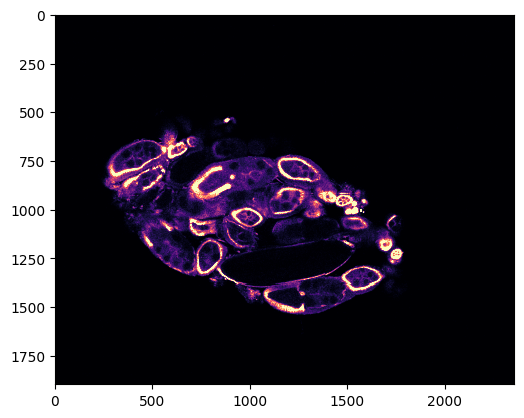

In [42]:
plt.imshow(
    img,
    cmap='magma',
    vmin=np.percentile(img, 3),
    vmax=np.percentile(img, 99),
)